<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Performance_Monitoring/Performance_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言  

在機器學習的實務中，ML 模型的訓練通常只是第一步，在 ML 模型訓練完成且部署上線後，如何確保 ML 模型在未知數據中，它的預測表現仍維持相當的水準，係保證 ML 模型的品質與長期有效的關鍵議題。  

有關於迴歸問題，下列將介紹可藉由何種指標，監控 ML 模型上線後的表現，且說明監控指標的意涵，讓我們能夠即時發現問題，並進行適當的模型調教。  

# 解釋能力與預測能力  
  
有關 ML 模型的表現，通常透過兩個核心能力來衡量：「解釋能力」與「預測能力」。

- <font color="#dddd00">**解釋能力**</font>  
係指 ML 模型能否利用已知的特徵變數 $X$ ，解釋**已知目標變數 $y$ 的變異**，常用來衡量解釋能力的量化指標有 : [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination)、 SHAP 值等。

- <font color="#dddd00">**預測能力**</font>    
著重於 ML 模型在新資料上的準確性，在未知的特徵變數 $X$ 上的預測表現，常用來評估預測能力的量化指標有 : [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error)、[MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)、[RMSE](https://en.wikipedia.org/wiki/Root_mean_square_deviation) 等。

# ML 模型的監控  

<font color="#dddd00">ML 模型部署上線後，監控**預測能力**!!</font>

- 當 ML 模型部署上線後，我們應關注的指標 : 預測能力。  
- 當 ML 模型**部署上線後**，<font color="#dddd00">預測能力逐漸變差，則，反應解釋能力逐漸不足</font>。
- 以迴歸問題而言，首先，我們可推導得下列的不等式關係【[推導過程](https://github.com/YenLinWu/Daily_Work_of_Data_Science/blob/main/MAE_and_R2/README.md#%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E6%A8%A1%E5%9E%8B%E6%8C%87%E6%A8%99%E7%9A%84%E9%97%9C%E4%BF%82---%E8%BF%B4%E6%AD%B8%E5%95%8F%E9%A1%8C)】</br>      
$$\displaystyle \text{MAE} \le \sigma \times \sqrt{1-R^2} \text{ ,}$$   
其中，$\displaystyle \text{MAE} = \frac{1}{N} \sum_{i=1}^{N} \vert y_i-\hat{y}_i \vert$ ， $\displaystyle \sigma \equiv \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i-\bar{y})^2}$ 與 $R^2 \equiv 1-\frac{\displaystyle \sum_{i=1}^{N} (y_i-\hat{y}_i)^2}{\displaystyle \sum_{i=1}^{N} (y_i-\bar{y})^2}$。</br>   
從不等式中我們可知，當預測能力指標 MAE 變大變差時，這意味著兩種可能 :  
  - ML 模型的解釋能力本身就不足，<font color="#dddd00">過擬合(Overfitting)的情況</font>；
  - <font color="#dddd00">因模型飄移(Model Drift)導致預測能力變差</font>，造成解釋能力的不足。
- 一般而言，**模型飄移(Model Drift)**概略還可區分成 : **資料飄移(Data Drift)**與**概念飄移(Concept Drift)**。資料飄移係指目標特徵 $y$ 的分布或特徵變數 $X$ 發生變化，而，概念飄移(Concept Drift)係指 $X$ 與 $y$ 的關係發生變化，兩種飄移狀況皆會造成 ML 模型在新資料上的表現不如預期。
- 當 ML 模型上線後發生模型飄移時，我們須進行模型再訓練(Model Retrain)，藉由近期新的數據來調教模型，確保 ML 模型能捕捉當前的數據特徵。

## 實務案例 Case Study

在下列三個實務案例中，皆發生了相同的情況，就是 : 訓練 ML 模型時的解釋能力 $R^2$ 達標且皆大於 0.8，但是，在模型部署上線後，模型的預測能力變差且解釋能力嚴重不足。

<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Performance_Monitoring/img
/Example_1.png">
</p>

<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Performance_Monitoring/img
/Example_2.png">
</p>

<p align="left">
<img width="600" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Performance_Monitoring/img
/Example_3.png">
</p>




從三個案例中，歸納出一個概念與二個建議 :    

- 訓練 ML 模型時的解釋能力高，不保證模型上線後的預測能力高。
- 在 ML 模型訓練完成上線後，當模型的預測能力指標上升幅度超出預期時，建議先確認是否發生資料飄移或概念飄移的情況；
- 如果，上線後數據的分布近似於訓練集，則，可推測此模型極可能有過擬合(Overfitting)的情況，建議增加訓練資料或更加收斂特徵變數，重新訓練模型。

# Takeaway  

針對**迴歸問題** ...
1.  $\displaystyle MAE \leq \sigma \times \sqrt{1-R^2}$
2. 在訓練 ML 模型時，當模型的解釋能力越強，則，其預測能力越準確。
3. 在監控 ML 模型時，關注模型的預測能力指標。
4. 在監控 ML 模型時，當 $MAE$ 超出預期的變差時，意味著模型飄移或過擬合的情況。

# Python 範例程式碼

## 載入套件

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

print('Python version:', sys.version[0:7])
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.10.12
NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.7.1
Scikit-Learn version: 1.5.2


## 讀取資料

In [2]:
# 讀取資料
sample_data_1 = pd.read_excel('./sample_data_for_performance_monitoring.xlsx', sheet_name='sample_1')
sample_data_2 = pd.read_excel('./sample_data_for_performance_monitoring.xlsx', sheet_name='sample_2')
sample_data_3 = pd.read_excel('./sample_data_for_performance_monitoring.xlsx', sheet_name='sample_3')

y_true_1 = np.array(sample_data_1['Ground_Truth'].to_list())
y_pred_1 = np.array(sample_data_1['Prediction'].to_list())
y_true_2 = np.array(sample_data_2['Ground_Truth'].to_list())
y_pred_2 = np.array(sample_data_2['Prediction'].to_list())
y_true_3 = np.array(sample_data_3['Ground_Truth'].to_list())
y_pred_3 = np.array(sample_data_3['Prediction'].to_list())

## 範例一

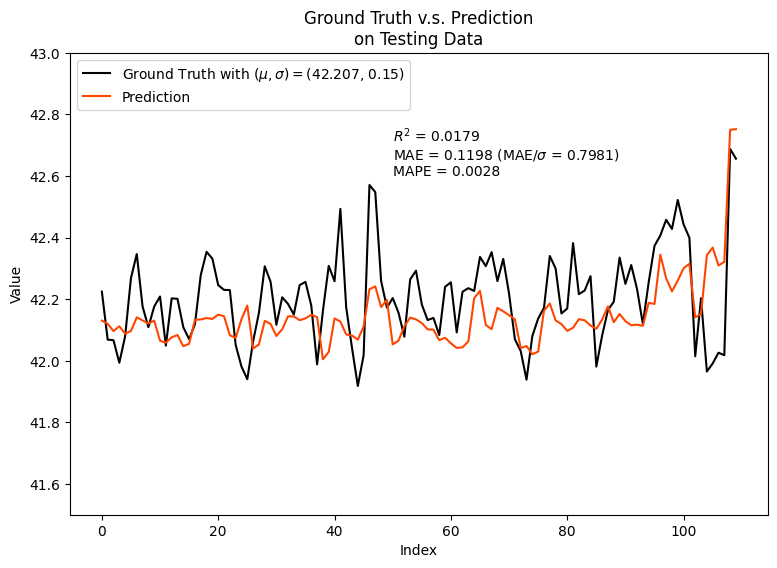

In [3]:
mean = np.mean(y_true_1)
std = np.std(y_true_1, ddof=1)
r2 = r2_score(y_true_1, y_pred_1)
mae = mean_absolute_error(y_true_1, y_pred_1)
mae_over_std = mae/std
mape = mean_absolute_percentage_error(y_true_1, y_pred_1)

plt.subplots(figsize=(9, 6))
plt.plot(y_true_1, color='black',
         label='Ground Truth with $(\mu, \sigma) = $('+str(np.round(mean, 3))+', '+str(np.round(std, 3))+')')
plt.plot(y_pred_1, linestyle='-', color='orangered', label='Prediction')
plt.legend(loc=2)
plt.ylim([41.5, 43])

text = '$R^2$ = {}\nMAE = {} (MAE/$\sigma$ = {})\nMAPE = {}'.format(np.round(r2, 4), np.round(mae, 4),
                                                                    np.round(mae_over_std, 4), np.round(mape, 4))
plt.text(50, 42.6, text)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ground Truth v.s. Prediction\non Testing Data')

img_path = 'Example_1_on_Testing.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 範例二

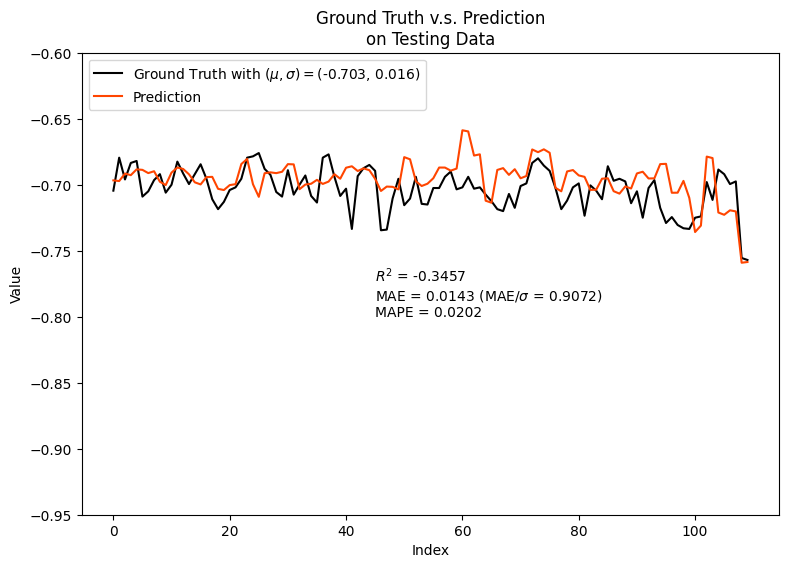

In [4]:
mean = np.mean(y_true_2)
std = np.std(y_true_2, ddof=1)
r2 = r2_score(y_true_2, y_pred_2)
mae = mean_absolute_error(y_true_2, y_pred_2)
mae_over_std = mae/std
mape = mean_absolute_percentage_error(y_true_2, y_pred_2)

plt.subplots(figsize=(9, 6))
plt.plot(y_true_2, color='black',
         label='Ground Truth with $(\mu, \sigma) = $('+str(np.round(mean, 3))+', '+str(np.round(std, 3))+')')
plt.plot(y_pred_2, linestyle='-', color='orangered', label='Prediction')
plt.legend(loc=2)
plt.ylim([-0.95, -0.6])
text = '$R^2$ = {}\nMAE = {} (MAE/$\sigma$ = {})\nMAPE = {}'.format(np.round(r2, 4), np.round(mae, 4),
                                                                    np.round(mae_over_std, 4), np.round(mape, 4))

plt.text(45, -0.8, text)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ground Truth v.s. Prediction\non Testing Data')

img_path = 'Example_2_on_Testing.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 範例三

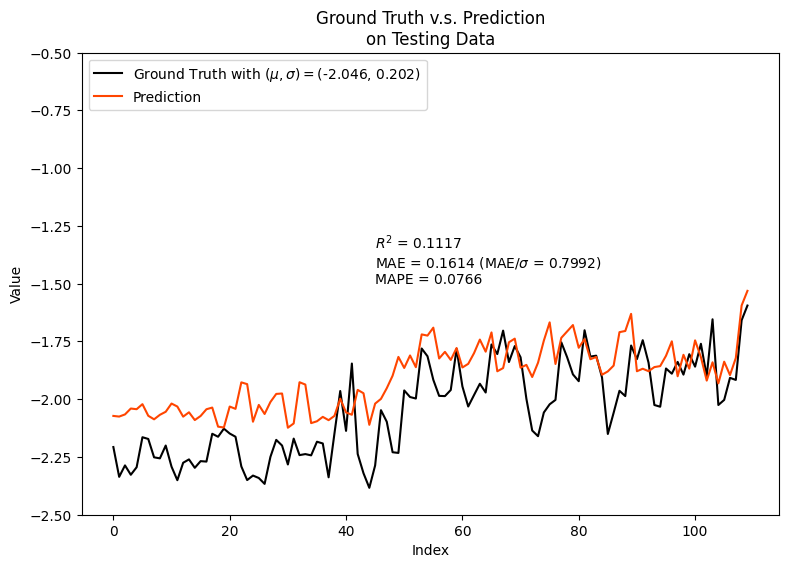

In [5]:
mean = np.mean(y_true_3)
std = np.std(y_true_3, ddof=1)
r2 = r2_score(y_true_3, y_pred_3)
mae = mean_absolute_error(y_true_3, y_pred_3)
mae_over_std = mae/std
mape = mean_absolute_percentage_error(y_true_3, y_pred_3)

plt.subplots(figsize=(9, 6))
plt.plot(y_true_3, color='black',
         label='Ground Truth with $(\mu, \sigma) = $('+str(np.round(mean, 3))+', '+str(np.round(std, 3))+')')
plt.plot(y_pred_3, linestyle='-', color='orangered', label='Prediction')
plt.legend(loc=2)
plt.ylim([-2.5, -0.5])
text = '$R^2$ = {}\nMAE = {} (MAE/$\sigma$ = {})\nMAPE = {}'.format(np.round(r2, 4), np.round(mae, 4),
                                                                    np.round(mae_over_std, 4), np.round(mape, 4))
plt.text(45, -1.5, text)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ground Truth v.s. Prediction\non Testing Data')

img_path = 'Example_3_on_Testing.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()